Fuel Analysis and Fuel Efficiency prediction.     

necessary libraries to import first

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

now lets load data set using pandas.

In [4]:
dataset = pd.read_csv(r"C:\Users\madan\Downloads\Auto-mpg dataset\auto-mpg.csv")

In [19]:
dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [22]:
columns_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name']

In [23]:
print(columns_names)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


lets check first five rows of data.

In [24]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


few more basic information about datset

In [27]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Checking if there are NaN or Null

In [28]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [32]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
#Since our horsepower column is object type hence we need to change it to intiger type
# we tried to verify the data.
#When we tried to transform all data in 'horsepower' column as int, we got the error below:
#dataset['horsepower'].astype(str).astype(int)
#ValueError: invalid literal for int() with base 10: '?'

In [18]:
dataset['horsepower'].str.contains(pat = '//D',regex = True).value_counts()

False    398
Name: horsepower, dtype: int64

In [11]:
#So we count how many '?' we have in dataset
dataset[dataset['horsepower']=='?'].count()['horsepower']



6

In [15]:
dataset['horsepower'].str.contains(pat='?',regex=False).value_counts()

False    392
True       6
Name: horsepower, dtype: int64

In [20]:
dataset['horsepower'].str.contains('[!@#$%^&*()?><]').value_counts()

False    392
True       6
Name: horsepower, dtype: int64

In [24]:
dataset = dataset.drop(dataset[dataset['horsepower'] == '?'].index)
len(dataset.index)
# check it has been removed or not
dataset['horsepower'].str.contains(pat='?',regex=False).value_counts()
# it has been removed now
dataset['horsepower'] = dataset['horsepower'].astype(str).astype(int)

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 39.1+ KB


In [29]:
dataset['horsepower'].isnull().sum()

0

In [30]:
dataset['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

The “origin” column in the dataset is categorical, so we need to use some one-hot encoding on it:

lets have some insights 

In [26]:
dataset.groupby('origin').mean()['mpg']

origin
1    20.033469
2    27.602941
3    30.450633
Name: mpg, dtype: float64

In [27]:
dataset.groupby(by=['origin','cylinders']).mean()
# 1 is USA, 2 is Europe, 3 is Japan

mpg  displacement  horsepower       weight  \
origin cylinders                                                     
1      4          28.013043    124.050725   80.956522  2427.391304   
       6          19.645205    226.643836   99.671233  3218.547945   
       8          14.963107    345.009709  158.300971  4114.718447   
2      4          28.106557    104.606557   78.311475  2338.295082   
       5          27.366667    145.000000   82.333333  3103.333333   
       6          20.100000    159.750000  113.500000  3382.500000   
3      3          20.550000     72.500000   99.250000  2398.500000   
       4          31.595652     99.768116   75.579710  2153.492754   
       6          23.883333    156.666667  115.833333  2882.000000   

                  acceleration  model year  
origin cylinders                            
1      4             16.465217   78.043478  
       6             16.467123   75.657534  
       8             12.955340   73.902913  
2      4             16.727869   75.344262  
       5             18.633333   79.000000  
       6             16.425000   78.250000  
3      3             13.250000   75.500000  
       4             16.569565   77.507246  
       6             13.550000   78.000000

In [33]:
dataset.groupby('origin')

In [34]:
dataset[dataset['cylinders'] == 4]['mpg']

14     24.0
18     27.0
19     26.0
20     25.0
21     24.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 199, dtype: float64

<AxesSubplot:xlabel='origin', ylabel='mpg'>

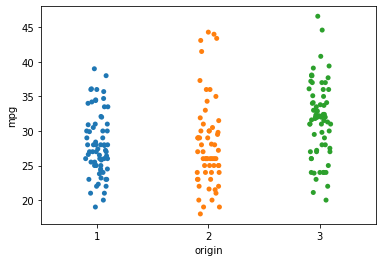

In [35]:
sns.stripplot(data=dataset, x='origin', y=dataset[dataset['cylinders'] == 4]['mpg'])

<AxesSubplot:xlabel='origin', ylabel='mpg'>

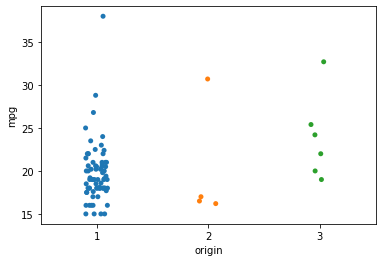

In [36]:
sns.stripplot(data=dataset, x='origin', y=dataset[dataset['cylinders'] == 6]['mpg'])

Exploratory Data Analysis

<AxesSubplot:xlabel='car name', ylabel='horsepower'>

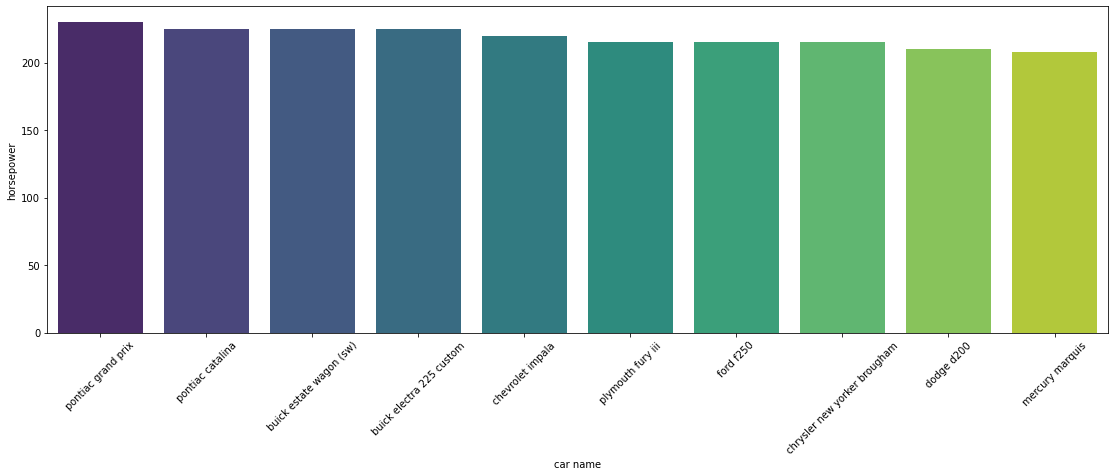

In [38]:
plt.figure(figsize=(19,6))
plt.xticks(rotation=45)
#sns.barplot(data=dataset.sort_values('horsepower', ascending=False).head(10), x='car name', y='horsepower')
sns.barplot(x='car name', y='horsepower', data=dataset.nlargest(10, 'horsepower'), palette='viridis')

<AxesSubplot:xlabel='car name', ylabel='horsepower'>

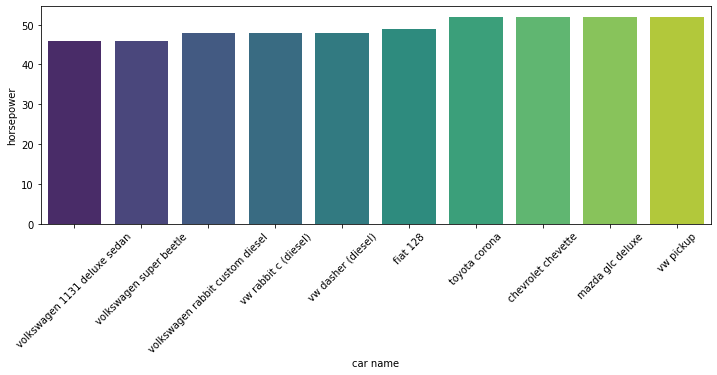

In [39]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
#sns.barplot(data=dataset.sort_values('horsepower', ascending=False).tail(10), x='car name', y='horsepower')
sns.barplot(x='car name', y='horsepower', data=dataset.nsmallest(10, 'horsepower'), palette='viridis')

Top 10 - Weight of cars

<AxesSubplot:xlabel='car name', ylabel='weight'>

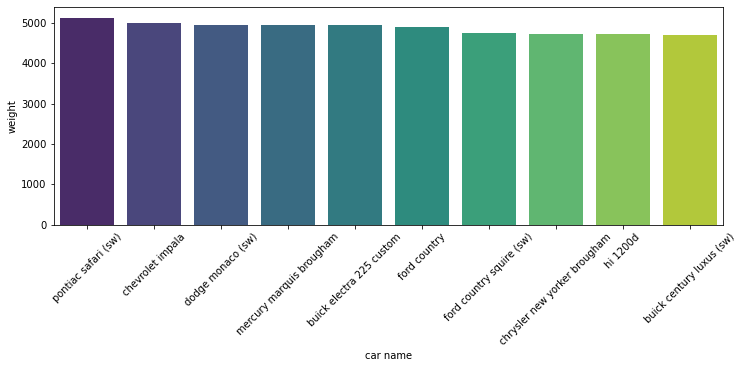

In [40]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
sns.barplot(x='car name', y='weight', data=dataset.nlargest(10, 'weight'), palette='viridis')

Top 10 - Acceleration

<AxesSubplot:xlabel='car name', ylabel='acceleration'>

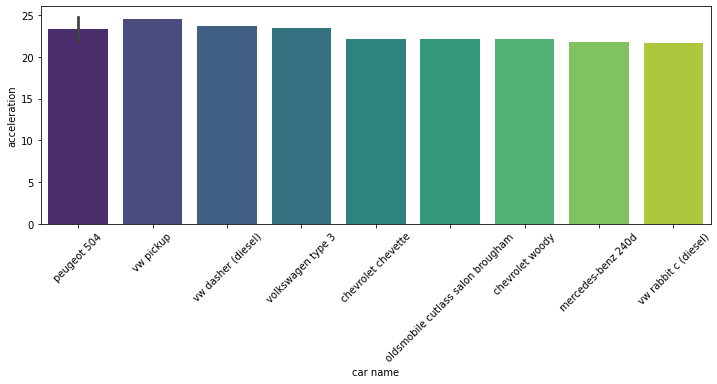

In [41]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
sns.barplot(x='car name', y='acceleration', data=dataset.nlargest(10, 'acceleration'), palette='viridis')

now look at coorelation

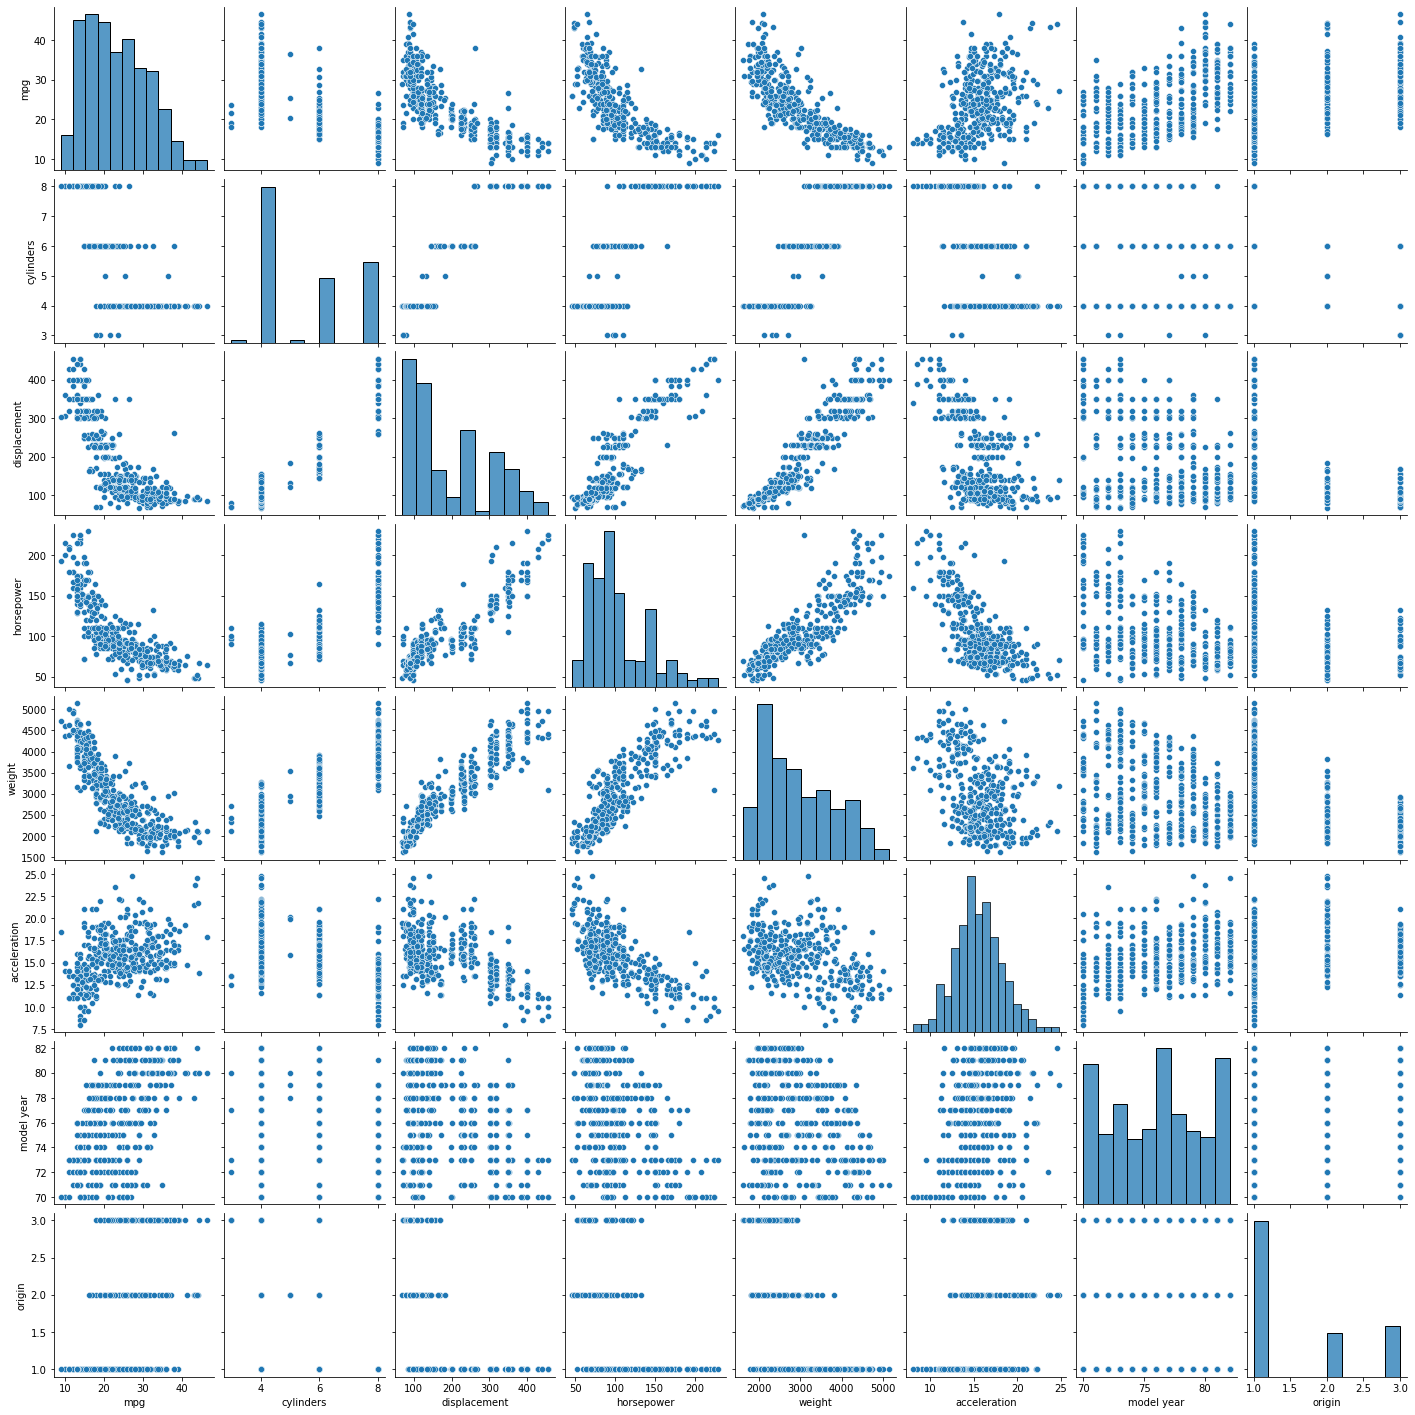

In [42]:
sns.pairplot(dataset)

<AxesSubplot:>

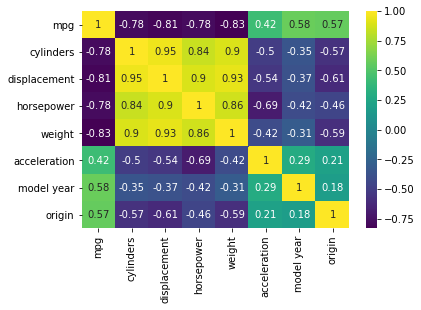

In [46]:
sns.heatmap(dataset.corr(), annot=True,cmap='viridis')

1. There is an important correlation among MPG, Displacement, Horsepower and Weight.
2. Acceleration,model year and origin are considerable important when compare to MPG.

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

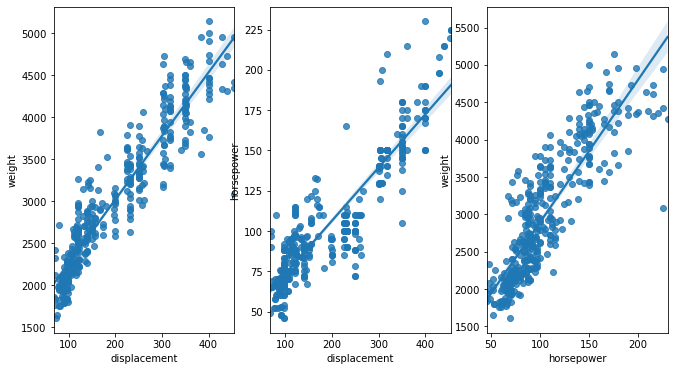

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11,6))

sns.regplot(x="displacement", y="weight", data=dataset, ax=axes[0])
sns.regplot(x="displacement", y="horsepower", data=dataset, ax=axes[1])
sns.regplot(x="horsepower", y="weight", data=dataset, ax=axes[2])





<AxesSubplot:xlabel='weight', ylabel='mpg'>

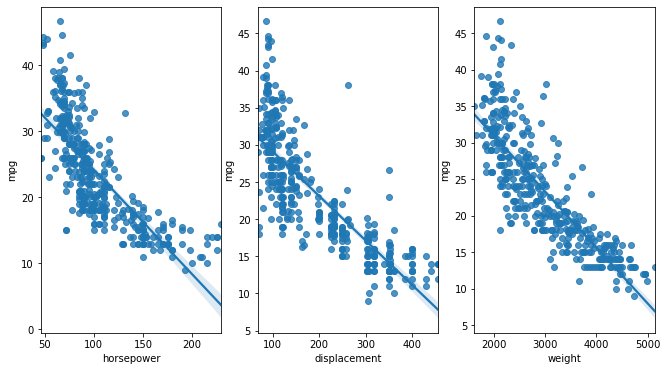

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11,6))

sns.regplot(x="horsepower", y="mpg", data=dataset, ax=axes[0])
sns.regplot(x="displacement", y="mpg", data=dataset, ax=axes[1])
sns.regplot(x="weight", y="mpg", data=dataset, ax=axes[2])
#sns.regplot(x="acceleration", y="mpg", data=dataset, ax=axes[2])

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

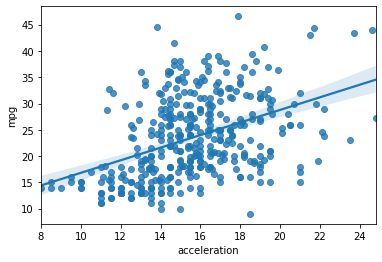

In [61]:
sns.regplot(x="acceleration", y="mpg", data=dataset)

<AxesSubplot:xlabel='model year', ylabel='mpg'>

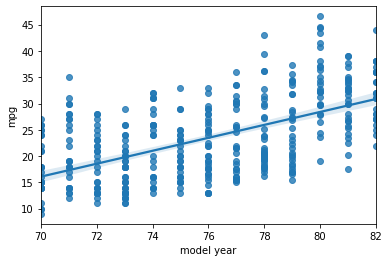

In [63]:
sns.regplot(x="model year", y="mpg", data=dataset)

In [82]:

import plotly.graph_objs as go
from plotly.offline import iplot

data = [go.Scatter(x = dataset['mpg'],
                   y = dataset['horsepower'],
                   mode = 'markers',
                   text=dataset['weight'],
                   marker=dict(size=10,
                               color = dataset['weight'],
                               showscale=True,
                               colorscale = 'Viridis',
                               colorbar = dict(title='Weight'),
                               opacity=0.8))]

layout = go.Layout(
    #title=dict(text='Horsepower - MPG - Weight',
    #                          y=0.9,
     #                         x=0.5,
      #                        xanchor= 'center',
       #                       yanchor= 'top'),
                              xaxis = dict(title='MPG'),
                              yaxis =dict(title='Horsepower'),
                   template='plotly_white')
fig = go.Figure(data=data,layout=layout)
iplot(fig)

ModuleNotFoundError: No module named 'plotly'

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 39.1+ KB


 1 origin and cylinders are categorical variables , before trainig we need to covert them into dumpy variables
 2  and drop car name and mmodel year , will remove them

In [74]:
# Importing the library to Label Encode and One-Hot Encode our categorical column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()




In [76]:
categorical = ["origin", 'cylinders']
dataset_final = pd.get_dummies(dataset, columns=categorical, drop_first=True)
dataset_final = dataset_final.drop(['car name', 'model year'], axis=1)
dataset_final

,mpg,displacement,horsepower,weight,acceleration,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,18.0,307.0,130,3504,12.0,0,0,0,0,0,1
1,15.0,350.0,165,3693,11.5,0,0,0,0,0,1
2,18.0,318.0,150,3436,11.0,0,0,0,0,0,1
3,16.0,304.0,150,3433,12.0,0,0,0,0,0,1
4,17.0,302.0,140,3449,10.5,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86,2790,15.6,0,0,1,0,0,0
394,44.0,97.0,52,2130,24.6,1,0,1,0,0,0
395,32.0,135.0,84,2295,11.6,0,0,1,0,0,0
396,28.0,120.0,79,2625,18.6,0,0,1,0,0,0


Train Test Split

In [77]:

X = dataset_final.drop('mpg', axis=1).values
y = dataset_final["mpg"].values

In [78]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [80]:
#Training models and Evaluating Model Performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.stats.oneway as oneway

from sklearn import linear_model
from sklearn import svm
from sklearn import metrics


Training models and Evaluating Model Performance

In [84]:
classifiers = [
    svm.SVR(kernel='linear'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
#    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
]

#trainingData = X_train
#trainingScores = y_train
#predictionData = X_test

for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    print("Coef:", clf.coef_)
    predictions = clf.predict(X_test)
#    print("MSE: ", metrics.mean_squared_error(y_test, predictions))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R²: ', metrics.explained_variance_score(y_test, predictions))
    print('\n')

SVR(kernel='linear')
Coef: [[ 0.08154091 -2.04181598 -2.32422692 -0.10928999 -0.38644625  0.71597389
   2.97757136  0.6951804   0.08484328  0.45459664]]
RMSE:  4.049595107235795
R²:  0.7395139068784686


SGDRegressor()
Coef: [ 0.54283268 -2.45744908 -3.51610424  0.07563769 -0.18761312  0.66915088
  2.18637206  0.63094463 -0.06056531  0.85366598]
RMSE:  4.026732332231061
R²:  0.7391286879307349


BayesianRidge()
Coef: [ 0.55896966 -2.3703299  -3.51102976  0.09518078 -0.15091863  0.70695777
  2.73261306  0.74142469  0.40997346  1.28715371]
RMSE:  4.018743463229597
R²:  0.740169387682596


ARDRegression()
Coef: [ 7.80596564e-01 -2.47657434e+00 -3.59775454e+00  5.52632114e-04
 -1.23871581e-03  6.64991897e-01  2.25700426e+00  5.60708808e-01
  5.50662981e-05  7.85861481e-01]
RMSE:  4.019206391261965
R²:  0.7401184032543102


PassiveAggressiveRegressor()
Coef: [-0.63064064 -2.122443   -2.98408389 -0.80617015  0.12721176 -1.37695891
  5.37133041  1.35990301  2.53201241  3.20181786]
RMSE:  4.85

We had the best fit using LinearRegression()

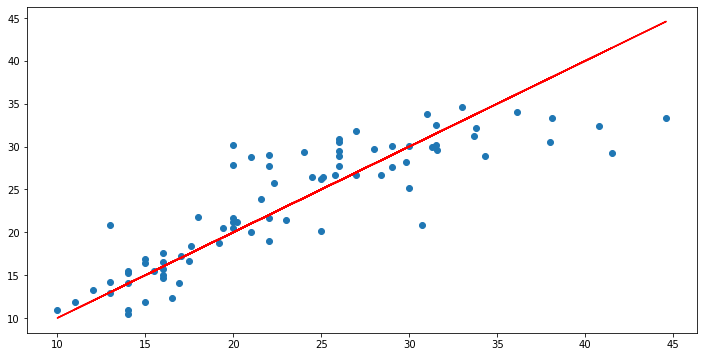

In [85]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test,'r')